In [1]:
import pandas
import seaborn
import matplotlib
import sklearn.impute
import sklearn.neighbors
import sklearn.feature_selection

%matplotlib inline

# Instructions

- Read the data from CSV files and properly set the indices


In [2]:
data_train = pandas.read_csv('../data/high_salary.train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
8616,830617145.0,8732.0,2.0,self-emp-inc,270079.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
21982,151595184.0,1894.0,3.0,local-gov,146325.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,2.0,2.0,USA,united-states,1.0
11191,303184281.0,9466.0,0.0,private,240767.0,hs-grad,9.0,never-married,other-service,not-in-family,white,female,0.0,0.0,1.0,USA,united-states,0.0
22229,369287837.0,8511.0,2.0,private,118536.0,hs-grad,9.0,divorced,machine-op-inspct,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0
20732,420084973.0,1281.0,3.0,private,160440.0,bachelors,13.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,615678823.0,8878.0,0.0,private,147253.0,assoc-acdm,12.0,never-married,sales,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
5390,473521238.0,6596.0,3.0,private,330543.0,preschool,1.0,married-civ-spouse,other-service,husband,white,male,0.0,0.0,2.0,MEX,mexico,0.0
860,679713121.0,1306.0,3.0,private,41223.0,some-college,10.0,married-civ-spouse,adm-clerical,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0


In [3]:
data_test = pandas.read_csv('../data/high_salary.test_features.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
27867,532734813.0,4238.0,NaN,private,214541.0,masters,14.0,divorced,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,CAN,canada
27868,636521681.0,1679.0,1.0,self-emp-not-inc,62932.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
27869,864336060.0,7623.0,2.0,private,269168.0,bachelors,13.0,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,0.0,0.0,2.0,CHN,china
27870,584984085.0,7483.0,0.0,self-emp-inc,148955.0,some-college,10.0,never-married,other-service,own-child,asian-pac-islander,female,0.0,0.0,1.0,ZAF,south
27871,924906706.0,3661.0,1.0,local-gov,182570.0,assoc-acdm,12.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,292322045.0,4914.0,1.0,local-gov,275369.0,some-college,10.0,never-married,protective-serv,not-in-family,black,male,0.0,0.0,2.0,USA,united-states
34863,475380257.0,6586.0,2.0,private,230467.0,bachelors,13.0,never-married,sales,own-child,white,male,0.0,0.0,2.0,DUE,germany
34864,463791400.0,387.0,1.0,local-gov,429897.0,bachelors,13.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,MEX,mexico


# Instructions

- Select any two features from these three features
    - Note that both train and test data should have a same features
- Use the following code snippet to visualize both features and labels on both data sets

```
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data['feature_1'],
    data['feature_2'],
    data['feature_3'],
    c = data['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)
```


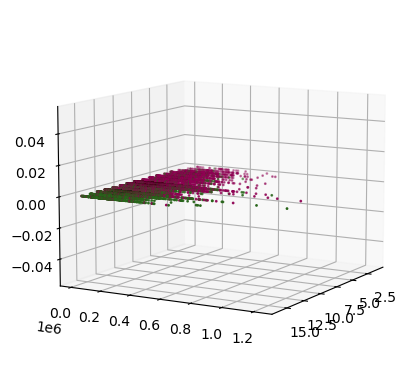

In [4]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_train['education-num'],
    data_train['fnlwgt'],
    
    c = data_train['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_test['education-num'],
    data_test['fnlwgt'],
    
    c = data_test['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

In [5]:
categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country'
]
for feature in categorical_features:
    possible_values = data_train[feature].unique()
    print(feature, possible_values)

workclass ['self-emp-inc' 'local-gov' 'private' 'state-gov' 'self-emp-not-inc' nan
 'federal-gov' 'without-pay' 'never-worked']
education ['bachelors' 'doctorate' 'hs-grad' '10th' 'some-college' 'masters'
 'prof-school' '5th-6th' '7th-8th' 'assoc-acdm' '12th' 'preschool'
 'assoc-voc' '9th' '11th' '1st-4th' nan]
marital-status ['married-civ-spouse' 'never-married' 'divorced' 'widowed' 'separated'
 'married-spouse-absent' 'married-af-spouse' nan]
occupation ['exec-managerial' 'prof-specialty' 'other-service' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'adm-clerical' 'tech-support'
 nan 'farming-fishing' 'transport-moving' 'priv-house-serv'
 'protective-serv' 'armed-forces']
relationship ['husband' 'not-in-family' 'other-relative' 'unmarried' 'own-child' 'wife'
 nan]
race ['white' 'black' 'amer-indian-eskimo' 'other' 'asian-pac-islander' nan]
sex ['male' 'female' nan]
native-country-code ['USA' 'ECU' 'FRA' 'MEX' 'CAN' 'SLV' 'ZAF' 'LAO' 'PER' 'PRT' 'DUE' nan
 'CHN' 'PRI

In [6]:
numerical_features = [
    'social-security-number',
    'house-number',
    'age-group',
    'fnlwgt',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
    
]

data_train[numerical_features].describe()

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,2.088600e+04,20873.00000,20887.000000,2.087700e+04,20886.000000,20877.000000,20879.000000,20879.000000
mean,5.509897e+08,5053.09553,1.910327,1.891310e+05,10.457483,0.306893,0.150821,2.042387
std,2.603583e+08,2863.89731,1.251276,1.033706e+05,2.607752,0.939457,0.643003,0.877044
min,1.000659e+08,101.00000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000
25%,3.209004e+08,2602.00000,1.000000,1.178490e+05,9.000000,0.000000,0.000000,2.000000
50%,5.521493e+08,5011.00000,2.000000,1.779450e+05,10.000000,0.000000,0.000000,2.000000
75%,7.770986e+08,7554.00000,3.000000,2.367690e+05,13.000000,0.000000,0.000000,3.000000
max,9.999588e+08,9998.00000,4.000000,1.226583e+06,16.000000,4.000000,4.000000,4.000000


In [7]:
data_train['label'].value_counts()

label
0.0    12135
1.0     8765
Name: count, dtype: int64

In [8]:
data_train.isna().sum(axis='index')

social-security-number      14
house-number                27
age-group                   13
workclass                 1057
fnlwgt                      23
education                   20
education-num               14
marital-status              23
occupation                1054
relationship                21
race                        22
sex                         22
capitalgain                 23
capitalloss                 21
hoursperweek                21
native-country-code        399
native-country             398
label                        0
dtype: int64

In [9]:
data_test.isna().sum(axis='index')

social-security-number      6
house-number                7
age-group                   9
workclass                 349
fnlwgt                      5
education                  11
education-num               3
marital-status              6
occupation                349
relationship               13
race                        2
sex                        11
capitalgain                 7
capitalloss                12
hoursperweek                6
native-country-code       130
native-country            123
dtype: int64

In [10]:
categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
]

In [11]:
data_train_categorical_features = data_train[categorical_features]
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
8616,self-emp-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male
21982,local-gov,doctorate,married-civ-spouse,prof-specialty,husband,white,male
11191,private,hs-grad,never-married,other-service,not-in-family,white,female
22229,private,hs-grad,divorced,machine-op-inspct,other-relative,black,male
20732,private,bachelors,married-civ-spouse,sales,husband,white,male
...,...,...,...,...,...,...,...
21575,private,assoc-acdm,never-married,sales,not-in-family,white,male
5390,private,preschool,married-civ-spouse,other-service,husband,white,male
860,private,some-college,married-civ-spouse,adm-clerical,husband,white,male


In [12]:
data_test_categorical_features = data_test[categorical_features]
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
27867,private,masters,divorced,prof-specialty,not-in-family,white,male
27868,self-emp-not-inc,hs-grad,married-civ-spouse,craft-repair,husband,white,male
27869,private,bachelors,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male
27870,self-emp-inc,some-college,never-married,other-service,own-child,asian-pac-islander,female
27871,local-gov,assoc-acdm,married-civ-spouse,protective-serv,husband,white,male
...,...,...,...,...,...,...,...
34862,local-gov,some-college,never-married,protective-serv,not-in-family,black,male
34863,private,bachelors,never-married,sales,own-child,white,male
34864,local-gov,bachelors,married-civ-spouse,prof-specialty,husband,white,male


In [13]:
categorical_imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [14]:
categorical_imputer.fit(data_train_categorical_features)

SimpleImputer(strategy='most_frequent')

In [15]:
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_train_categorical_features.index
)
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
8616,self-emp-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male
21982,local-gov,doctorate,married-civ-spouse,prof-specialty,husband,white,male
11191,private,hs-grad,never-married,other-service,not-in-family,white,female
22229,private,hs-grad,divorced,machine-op-inspct,other-relative,black,male
20732,private,bachelors,married-civ-spouse,sales,husband,white,male
...,...,...,...,...,...,...,...
21575,private,assoc-acdm,never-married,sales,not-in-family,white,male
5390,private,preschool,married-civ-spouse,other-service,husband,white,male
860,private,some-college,married-civ-spouse,adm-clerical,husband,white,male


In [16]:
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_test_categorical_features.index
)
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
27867,private,masters,divorced,prof-specialty,not-in-family,white,male
27868,self-emp-not-inc,hs-grad,married-civ-spouse,craft-repair,husband,white,male
27869,private,bachelors,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male
27870,self-emp-inc,some-college,never-married,other-service,own-child,asian-pac-islander,female
27871,local-gov,assoc-acdm,married-civ-spouse,protective-serv,husband,white,male
...,...,...,...,...,...,...,...
34862,local-gov,some-college,never-married,protective-serv,not-in-family,black,male
34863,private,bachelors,never-married,sales,own-child,white,male
34864,local-gov,bachelors,married-civ-spouse,prof-specialty,husband,white,male


In [17]:
data_train_categorical_features.isna().sum(axis='index')

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

In [18]:
data_test_categorical_features.isna().sum(axis='index')

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

In [19]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
ordinal_encoder

OrdinalEncoder()

In [20]:
ordinal_encoder.fit(data_train_categorical_features)

OrdinalEncoder()

In [21]:
ordinal_encoder.categories_

[array(['federal-gov', 'local-gov', 'never-worked', 'private',
        'self-emp-inc', 'self-emp-not-inc', 'state-gov', 'without-pay'],
       dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'assoc-acdm', 'assoc-voc', 'bachelors', 'doctorate', 'hs-grad',
        'masters', 'preschool', 'prof-school', 'some-college'],
       dtype=object),
 array(['divorced', 'married-af-spouse', 'married-civ-spouse',
        'married-spouse-absent', 'never-married', 'separated', 'widowed'],
       dtype=object),
 array(['adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial',
        'farming-fishing', 'handlers-cleaners', 'machine-op-inspct',
        'other-service', 'priv-house-serv', 'prof-specialty',
        'protective-serv', 'sales', 'tech-support', 'transport-moving'],
       dtype=object),
 array(['husband', 'not-in-family', 'other-relative', 'own-child',
        'unmarried', 'wife'], dtype=object),
 array(['amer-indian-eskimo', 'asian-pa

In [22]:
data_train_categorical_features = pandas.DataFrame(
    data = ordinal_encoder.transform(data_train_categorical_features),
    columns = ordinal_encoder.get_feature_names_out(),
    index = data_train_categorical_features.index
)
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
8616,4.0,9.0,2.0,3.0,0.0,4.0,1.0
21982,1.0,10.0,2.0,9.0,0.0,4.0,1.0
11191,3.0,11.0,4.0,7.0,1.0,4.0,0.0
22229,3.0,11.0,0.0,6.0,2.0,2.0,1.0
20732,3.0,9.0,2.0,11.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...
21575,3.0,7.0,4.0,11.0,1.0,4.0,1.0
5390,3.0,13.0,2.0,7.0,0.0,4.0,1.0
860,3.0,15.0,2.0,0.0,0.0,4.0,1.0


In [23]:
data_test_categorical_features = pandas.DataFrame(
    data = ordinal_encoder.transform(data_test_categorical_features),
    columns = ordinal_encoder.get_feature_names_out(),
    index = data_test_categorical_features.index
)
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
27867,3.0,12.0,0.0,9.0,1.0,4.0,1.0
27868,5.0,11.0,2.0,2.0,0.0,4.0,1.0
27869,3.0,9.0,2.0,9.0,0.0,1.0,1.0
27870,4.0,15.0,4.0,7.0,3.0,1.0,0.0
27871,1.0,7.0,2.0,10.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...
34862,1.0,15.0,4.0,10.0,1.0,2.0,1.0
34863,3.0,9.0,4.0,11.0,3.0,4.0,1.0
34864,1.0,9.0,2.0,9.0,0.0,4.0,1.0


## For numerical features

In [24]:
numerical_features = [
    'social-security-number',
    'house-number',
    'age-group',
    'fnlwgt',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
]

In [25]:
data_train_numerical_features = data_train[numerical_features]
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
8616,830617145.0,8732.0,2.0,270079.0,13.0,0.0,0.0,3.0
21982,151595184.0,1894.0,3.0,146325.0,16.0,0.0,2.0,2.0
11191,303184281.0,9466.0,0.0,240767.0,9.0,0.0,0.0,1.0
22229,369287837.0,8511.0,2.0,118536.0,9.0,0.0,0.0,2.0
20732,420084973.0,1281.0,3.0,160440.0,13.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
21575,615678823.0,8878.0,0.0,147253.0,12.0,0.0,0.0,2.0
5390,473521238.0,6596.0,3.0,330543.0,1.0,0.0,0.0,2.0
860,679713121.0,1306.0,3.0,41223.0,10.0,0.0,0.0,2.0


In [26]:
data_test_numerical_features = data_test[numerical_features]
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
27867,532734813.0,4238.0,NaN,214541.0,14.0,0.0,0.0,2.0
27868,636521681.0,1679.0,1.0,62932.0,9.0,0.0,0.0,2.0
27869,864336060.0,7623.0,2.0,269168.0,13.0,0.0,0.0,2.0
27870,584984085.0,7483.0,0.0,148955.0,10.0,0.0,0.0,1.0
27871,924906706.0,3661.0,1.0,182570.0,12.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
34862,292322045.0,4914.0,1.0,275369.0,10.0,0.0,0.0,2.0
34863,475380257.0,6586.0,2.0,230467.0,13.0,0.0,0.0,2.0
34864,463791400.0,387.0,1.0,429897.0,13.0,0.0,0.0,2.0


In [27]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy = 'mean')
numerical_imputer

SimpleImputer()

In [28]:
numerical_imputer.fit(data_train_numerical_features)

SimpleImputer()

In [29]:
data_train_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_train_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_train_numerical_features.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
8616,830617145.0,8732.0,2.0,270079.0,13.0,0.0,0.0,3.0
21982,151595184.0,1894.0,3.0,146325.0,16.0,0.0,2.0,2.0
11191,303184281.0,9466.0,0.0,240767.0,9.0,0.0,0.0,1.0
22229,369287837.0,8511.0,2.0,118536.0,9.0,0.0,0.0,2.0
20732,420084973.0,1281.0,3.0,160440.0,13.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
21575,615678823.0,8878.0,0.0,147253.0,12.0,0.0,0.0,2.0
5390,473521238.0,6596.0,3.0,330543.0,1.0,0.0,0.0,2.0
860,679713121.0,1306.0,3.0,41223.0,10.0,0.0,0.0,2.0


In [30]:
data_test_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_test_numerical_features.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
27867,532734813.0,4238.0,1.910327,214541.0,14.0,0.0,0.0,2.0
27868,636521681.0,1679.0,1.000000,62932.0,9.0,0.0,0.0,2.0
27869,864336060.0,7623.0,2.000000,269168.0,13.0,0.0,0.0,2.0
27870,584984085.0,7483.0,0.000000,148955.0,10.0,0.0,0.0,1.0
27871,924906706.0,3661.0,1.000000,182570.0,12.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
34862,292322045.0,4914.0,1.000000,275369.0,10.0,0.0,0.0,2.0
34863,475380257.0,6586.0,2.000000,230467.0,13.0,0.0,0.0,2.0
34864,463791400.0,387.0,1.000000,429897.0,13.0,0.0,0.0,2.0


In [31]:
data_train_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

In [32]:
data_test_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

In [33]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [34]:
standard_scaler.fit(data_train_numerical_features)

StandardScaler()

In [35]:
data_train_numerical_features = pandas.DataFrame(
    data = standard_scaler.transform(data_train_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index = data_train_numerical_features.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
8616,1.074396,1.285441,0.071689,0.783535,0.975334,-0.326858,-0.234681,1.092439
21982,-1.534570,-1.103815,0.871141,-0.414340,2.126163,-0.326858,2.877363,-0.048355
11191,-0.952128,1.541907,-1.527215,0.499810,-0.559105,-0.326858,-0.234681,-1.189149
22229,-0.698142,1.208222,0.071689,-0.683323,-0.559105,-0.326858,-0.234681,-0.048355
20732,-0.502967,-1.318003,0.871141,-0.277714,0.975334,-0.326858,-0.234681,1.092439
...,...,...,...,...,...,...,...,...
21575,0.248551,1.336455,-1.527215,-0.405358,0.591724,-0.326858,-0.234681,-0.048355
5390,-0.297652,0.539104,0.871141,1.368795,-3.627983,-0.326858,-0.234681,-0.048355
860,0.494586,-1.309268,0.871141,-1.431674,-0.175495,-0.326858,-0.234681,-0.048355


In [36]:
data_test_numerical_features = pandas.DataFrame(
    data = standard_scaler.transform(data_test_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index = data_test_numerical_features.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
27867,-0.070140,-0.284801,-1.775140e-16,0.245956,1.358944,-0.326858,-0.234681,-0.048355
27868,0.328634,-1.178938,-7.277627e-01,-1.221542,-0.559105,-0.326858,-0.234681,-0.048355
27869,1.203952,0.897947,7.168925e-02,0.774717,0.975334,-0.326858,-0.234681,-0.048355
27870,0.130615,0.849030,-1.527215e+00,-0.388883,-0.175495,-0.326858,-0.234681,-1.189149
27871,1.436679,-0.486410,-7.277627e-01,-0.063507,0.591724,-0.326858,-0.234681,-0.048355
...,...,...,...,...,...,...,...,...
34862,-0.993863,-0.048601,-7.277627e-01,0.834739,-0.175495,-0.326858,-0.234681,-0.048355
34863,-0.290510,0.535610,7.168925e-02,0.400111,0.975334,-0.326858,-0.234681,-0.048355
34864,-0.335037,-1.630374,-7.277627e-01,2.330491,0.975334,-0.326858,-0.234681,-0.048355


In [37]:
data_train = (
    data_train_categorical_features
    .join(data_train_numerical_features)
    .join(data_train[['label']])
)
data_train

,workclass,education,marital-status,occupation,relationship,race,sex,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,,
8616,4.0,9.0,2.0,3.0,0.0,4.0,1.0,1.074396,1.285441,0.071689,0.783535,0.975334,-0.326858,-0.234681,1.092439,1.0
21982,1.0,10.0,2.0,9.0,0.0,4.0,1.0,-1.534570,-1.103815,0.871141,-0.414340,2.126163,-0.326858,2.877363,-0.048355,1.0
11191,3.0,11.0,4.0,7.0,1.0,4.0,0.0,-0.952128,1.541907,-1.527215,0.499810,-0.559105,-0.326858,-0.234681,-1.189149,0.0
22229,3.0,11.0,0.0,6.0,2.0,2.0,1.0,-0.698142,1.208222,0.071689,-0.683323,-0.559105,-0.326858,-0.234681,-0.048355,0.0
20732,3.0,9.0,2.0,11.0,0.0,4.0,1.0,-0.502967,-1.318003,0.871141,-0.277714,0.975334,-0.326858,-0.234681,1.092439,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3.0,7.0,4.0,11.0,1.0,4.0,1.0,0.248551,1.336455,-1.527215,-0.405358,0.591724,-0.326858,-0.234681,-0.048355,0.0
5390,3.0,13.0,2.0,7.0,0.0,4.0,1.0,-0.297652,0.539104,0.871141,1.368795,-3.627983,-0.326858,-0.234681,-0.048355,0.0
860,3.0,15.0,2.0,0.0,0.0,4.0,1.0,0.494586,-1.309268,0.871141,-1.431674,-0.175495,-0.326858,-0.234681,-0.048355,1.0


In [38]:
data_test = (
    data_test_categorical_features
    .join(data_test_numerical_features)
    
)
data_test

,workclass,education,marital-status,occupation,relationship,race,sex,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,,,,,,,,
27867,3.0,12.0,0.0,9.0,1.0,4.0,1.0,-0.070140,-0.284801,-1.775140e-16,0.245956,1.358944,-0.326858,-0.234681,-0.048355
27868,5.0,11.0,2.0,2.0,0.0,4.0,1.0,0.328634,-1.178938,-7.277627e-01,-1.221542,-0.559105,-0.326858,-0.234681,-0.048355
27869,3.0,9.0,2.0,9.0,0.0,1.0,1.0,1.203952,0.897947,7.168925e-02,0.774717,0.975334,-0.326858,-0.234681,-0.048355
27870,4.0,15.0,4.0,7.0,3.0,1.0,0.0,0.130615,0.849030,-1.527215e+00,-0.388883,-0.175495,-0.326858,-0.234681,-1.189149
27871,1.0,7.0,2.0,10.0,0.0,4.0,1.0,1.436679,-0.486410,-7.277627e-01,-0.063507,0.591724,-0.326858,-0.234681,-0.048355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,1.0,15.0,4.0,10.0,1.0,2.0,1.0,-0.993863,-0.048601,-7.277627e-01,0.834739,-0.175495,-0.326858,-0.234681,-0.048355
34863,3.0,9.0,4.0,11.0,3.0,4.0,1.0,-0.290510,0.535610,7.168925e-02,0.400111,0.975334,-0.326858,-0.234681,-0.048355
34864,1.0,9.0,2.0,9.0,0.0,4.0,1.0,-0.335037,-1.630374,-7.277627e-01,2.330491,0.975334,-0.326858,-0.234681,-0.048355


# Instruction

- Define a `sklearn.neighbors.KNeighborsClassifier` model with the following configurations to be used as an estimator
```
        n_neighbors = 5,
        weights     = 'uniform', 
        p           = 2, 
```
    
- Use `sklearn.feature_selection.SequentialFeatureSelector` with the following configurations for automatic feature selection

```
        estimator            = model,
        n_features_to_select = 2,
        direction            = 'backward'

```

- Now, fit the feature selector to the training data


In [39]:
model = sklearn.neighbors.KNeighborsClassifier(
        n_neighbors = 2,
        weights = 'uniform', 
        p= 2, 
)
model

KNeighborsClassifier(n_neighbors=2)

In [40]:
feature_selection = sklearn.feature_selection.SequentialFeatureSelector(
        estimator= model,
        n_features_to_select = 2,
        direction= 'backward'
)
feature_selection

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=2),
                          n_features_to_select=2)

In [41]:
data_train.dtypes

workclass                 float64
education                 float64
marital-status            float64
occupation                float64
relationship              float64
race                      float64
sex                       float64
social-security-number    float64
house-number              float64
age-group                 float64
fnlwgt                    float64
education-num             float64
capitalgain               float64
capitalloss               float64
hoursperweek              float64
label                     float64
dtype: object

In [42]:
data_train.isna().sum(axis='index')

workclass                 0
education                 0
marital-status            0
occupation                0
relationship              0
race                      0
sex                       0
social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
label                     0
dtype: int64

In [43]:
data_train.isnull().sum(axis='index')

workclass                 0
education                 0
marital-status            0
occupation                0
relationship              0
race                      0
sex                       0
social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
label                     0
dtype: int64

In [44]:
feature_selection.fit(
    X=data_train.drop(['label'], axis='columns'),
    y=data_train['label'],
)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=2),
                          n_features_to_select=2)

# Instruction
- Use `.get_feature_names_out()` to get the optimal subset of features from the feature selector
- Create `pandas.DataFrame`s that contain only those selected features for training data and test data respectively 

In [45]:
selected_features = feature_selection.get_feature_names_out().tolist()
selected_features

['marital-status', 'education-num']

In [46]:
data_train_feature_selected = data_train[selected_features + ['label']]
data_train_feature_selected

,marital-status,education-num,label
id,,,
8616,2.0,0.975334,1.0
21982,2.0,2.126163,1.0
11191,4.0,-0.559105,0.0
22229,0.0,-0.559105,0.0
20732,2.0,0.975334,1.0
...,...,...,...
21575,4.0,0.591724,0.0
5390,2.0,-3.627983,0.0
860,2.0,-0.175495,1.0


In [47]:
data_test_feature_selected = data_test[selected_features]
data_test_feature_selected

,marital-status,education-num
id,,
27867,0.0,1.358944
27868,2.0,-0.559105
27869,2.0,0.975334
27870,4.0,-0.175495
27871,2.0,0.591724
...,...,...
34862,4.0,-0.175495
34863,4.0,0.975334
34864,2.0,0.975334


# Instruction

- Plot `seaborn.scatterplot` using the selected features with `label` as `hue`

seaborn.scatterplot(
    data = data_train_feature_selected,
    x ='feature_2',
    y ='feature_3',
    hue = 'label',
)

seaborn.scatterplot(
    data = data_test_feature_selected,
    x ='feature_2',
    y ='feature_3',
    hue = 'label',
)

# Instructions

- Simply write the train data set to `./data/features.train.csv`
- Simply write the test data set to `./data/features.test.csv`


In [49]:
data_train_feature_selected.to_csv('./data/n_high_salary_features.train.csv')

In [50]:
data_test_feature_selected.to_csv('./data/n_high_salary_features.test.csv')